In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.cross_validation import train_test_split
%matplotlib inline

In [43]:
crunchinvestments = pd.read_csv('D:/Dropbox/Prog/Py16/AAMTS/octo-parakeet/Crunchbase/investments.csv')
crunchcompanies = pd.read_csv('D:/Dropbox/Prog/Py16/AAMTS/octo-parakeet/Crunchbase/companies.csv')

In [46]:
#crunchinvestments.head(2)
crunchcompanies.head(5)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [47]:
crunchco = crunchinvestments["company_name"]
crunchco2 = crunchcompanies["name"]

In [48]:
print(crunchco.shape,crunchco2.shape)

(168647,) (66368,)


In [49]:
glassdf = pd.read_csv('main_df_Aug1.csv')
#glassdf.head()
glassco = glassdf["name"]
glassco.shape

(28640,)

In [50]:
crunchset = set(crunchco)
crunchset2 = set(crunchco2)
glassset = set(glassco)

print(len(crunchset),len(crunchset2),len(glassset))

44579 66103 8504 764


In [53]:
crunchintersect = crunchset2.intersection(crunchset)
len(crunchintersect)

44578

In [55]:
crunchglassintersect = crunchset2.intersection(glassset)
len(crunchglassintersect)

994

In [8]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [11]:
cb_df = pd.read_csv("Users/Jeff/Dropbox/Prog/Py16/AAMTS/McNulty/octo-parakeet/Crunchbase/companies.csv")

cName_df = pd.DataFrame()
cbUSA_df = cb_df[cb_df['country_code']=='USA']

q = 'select * from cbUSA_df join dta on dta.name = cbUSA_df.name'
merge_df = pysqldf(q)

OSError: File b'Users/Jeff/Dropbox/Prog/Py16/AAMTS/McNulty/octo-parakeet/Crunchbase/companies.csv' does not exist

In [7]:
# load dataset
dta = pd.read_csv("main_df_Aug1.csv")

In [3]:
dta.head()

,Unnamed: 0,name,industry,sectorName,overallRating,compensationAndBenefitsRating,careerOpportunitiesRating,recommendToFriendRating,cultureAndValuesRating,workLifeBalanceRating,...,numberOfRatings,id,industryName,industryId,ceo,ceoname,ceonumratings,ceopctapprove,ceopctdisapprove,ceotitle
0,0,Walmart,General Merchandise & Superstores,Retail,3.1,3.0,3.3,0.5,3.0,2.8,...,20241,715,General Merchandise & Superstores,200109.0,"{'pctDisapprove': 36, 'numberOfRatings': 4950,...",Doug McMillon,4950,64,36,CEO
1,1,Target,"Department, Clothing, & Shoe Stores",Retail,3.3,3.1,3.1,0.6,3.4,3.1,...,18695,194,"Department, Clothing, & Shoe Stores",200105.0,"{'pctDisapprove': 25, 'name': 'Brian Cornell',...",Brian Cornell,3276,75,25,CEO
2,2,Bank of America,Banks & Credit Unions,Finance,3.4,3.6,3.2,0.6,3.2,3.3,...,13343,8874,Banks & Credit Unions,200048.0,"{'pctDisapprove': 26, 'numberOfRatings': 5399,...",John McHugh,3633,83,17,Secretary
3,3,US Army,Federal Agencies,Government,4.0,4.2,4.1,0.8,4.0,2.8,...,12359,41322,Federal Agencies,200056.0,"{'pctDisapprove': 17, 'numberOfRatings': 3633,...",Randall L. Stephenson,5408,73,27,Chairman and CEO
4,4,AT&T,Telecommunications Services,Telecommunications,3.4,3.8,3.2,0.6,3.2,2.8,...,12131,613,Telecommunications Services,200122.0,"{'pctDisapprove': 27, 'numberOfRatings': 5408,...",Virginia Rometty,7621,55,45,CEO


(array([   16.,   306.,   824.,  4104.,  5721.,  9157.,  5599.,  2125.,
          701.,    87.]),
 array([ 1.4 ,  1.76,  2.12,  2.48,  2.84,  3.2 ,  3.56,  3.92,  4.28,
         4.64,  5.  ]),
 <a list of 10 Patch objects>)

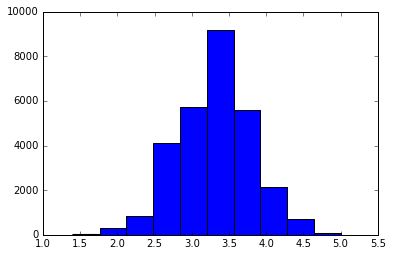

In [4]:
plt.hist(list(dta['overallRating']))

In [5]:
dta.columns

Index(['Unnamed: 0', 'name', 'industry', 'sectorName', 'overallRating',
       'compensationAndBenefitsRating', 'careerOpportunitiesRating',
       'recommendToFriendRating', 'cultureAndValuesRating',
       'workLifeBalanceRating', 'seniorLeadershipRating', 'numberOfRatings',
       'id', 'industryName', 'industryId', 'ceo', 'ceoname', 'ceonumratings',
       'ceopctapprove', 'ceopctdisapprove', 'ceotitle'],
      dtype='object')

In [6]:
# add "affair" column: 1 represents having affairs, 0 represents not
dta['goodCompany'] = (dta.overallRating >= 3.8).astype(int)

In [7]:
dta['numberOfRatings'].describe()

count    28640.000000
mean       698.802060
std       1559.971563
min         48.000000
25%        165.000000
50%        307.000000
75%        638.000000
max      22911.000000
Name: numberOfRatings, dtype: float64

# Data Visualization 

In [8]:
# show plots in the notebook
%matplotlib inline

# Classification Models

In [9]:
dta.columns

Index(['Unnamed: 0', 'name', 'industry', 'sectorName', 'overallRating',
       'compensationAndBenefitsRating', 'careerOpportunitiesRating',
       'recommendToFriendRating', 'cultureAndValuesRating',
       'workLifeBalanceRating', 'seniorLeadershipRating', 'numberOfRatings',
       'id', 'industryName', 'industryId', 'ceo', 'ceoname', 'ceonumratings',
       'ceopctapprove', 'ceopctdisapprove', 'ceotitle', 'goodCompany'],
      dtype='object')

In [10]:
X = dta[['numberOfRatings','compensationAndBenefitsRating','careerOpportunitiesRating', \
        'recommendToFriendRating','cultureAndValuesRating','workLifeBalanceRating','seniorLeadershipRating', \
        'ceonumratings','ceopctapprove']]

y = dta['goodCompany']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
## Here are some possible models to use, but feel free to import whichever ones you like

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

In [13]:
## Here are the precision-recall curve and log-likelihood computation functions

import numpy as np
import matplotlib.pyplot as plt


def pr_curve(truthvec, scorevec, digit_prec=2):
    threshvec = np.unique(np.round(scorevec,digit_prec))
    numthresh = len(threshvec)
    tpvec = np.zeros(numthresh)
    fpvec = np.zeros(numthresh)
    fnvec = np.zeros(numthresh)

    for i in range(numthresh):
        thresh = threshvec[i]
        tpvec[i] = sum(truthvec[scorevec>=thresh])
        fpvec[i] = sum(1-truthvec[scorevec>=thresh])
        fnvec[i] = sum(truthvec[scorevec<thresh])
    recallvec = tpvec/(tpvec + fnvec)
    precisionvec = tpvec/(tpvec + fpvec)
    plt.plot(precisionvec,recallvec)
    plt.axis([0, 1, 0, 1])
    return (recallvec, precisionvec, threshvec)

def log_lik_binary(truthvec, probvec):
    return np.sum((np.log(probvec)*truthvec) + (np.log(1-probvec)*(1-truthvec)))

In [14]:
# Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
pred_vals_lr = model_lr.predict_proba(X_test)



In [15]:
log_lik_binary(y_test,pred_vals_lr[:,1])

-2104.1119212269605

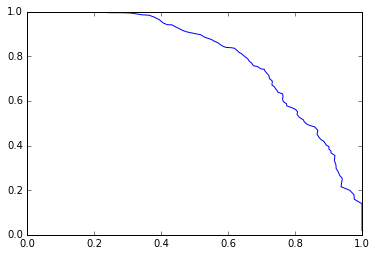

In [16]:
pr_curve(y_test,pred_vals_lr[:,1]);

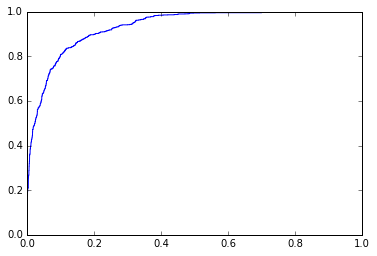

In [17]:
fpr, tpr, thresholds = roc_curve(y_test,pred_vals_lr[:,1])
plt.plot(fpr, tpr)

In [18]:
roc_auc_score(y_test,pred_vals_lr[:,1])

0.93367991369872061